In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for encoding
from sklearn.preprocessing import LabelEncoder

#split data
from sklearn.model_selection import train_test_split

#scala data
from sklearn.preprocessing import RobustScaler

#grid search
from sklearn.model_selection import GridSearchCV

#feature_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#evaluate
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


#dl
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential

#evaluate
from sklearn.metrics import classification_report,confusion_matrix

#save
import pickle as pkl

# READ DATA

In [2]:
df=pd.read_csv('loans_risks.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
df.shape

(307511, 122)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
# remove outlayers
null_columns=df.columns[df.isna().any()].tolist()
for i in null_columns:
  count=df[i].nunique()
  if(count>200000):
    print(i,count)
    df=df.drop([i], axis=1)

OWN_CAR_AGE 202929
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
FLOORSMIN_AVG 208642
LIVINGAPARTMENTS_AVG 210199
NONLIVINGAPARTMENTS_AVG 213514
YEARS_BUILD_MODE 204488
COMMONAREA_MODE 214865


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


FLOORSMIN_MODE 208642
LIVINGAPARTMENTS_MODE 210199
NONLIVINGAPARTMENTS_MODE 213514
YEARS_BUILD_MEDI 204488
COMMONAREA_MEDI 214865
FLOORSMIN_MEDI 208642
LIVINGAPARTMENTS_MEDI 210199
NONLIVINGAPARTMENTS_MEDI 213514
FONDKAPREMONT_MODE 210295


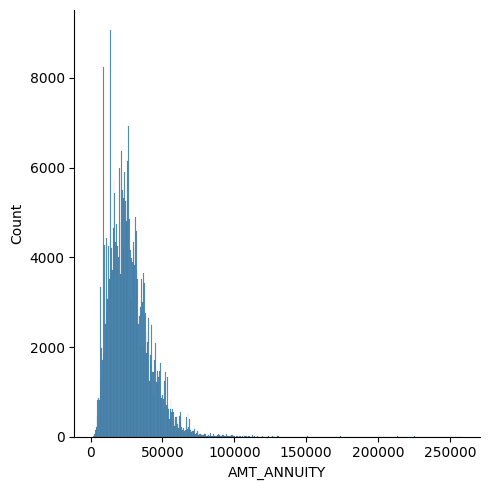

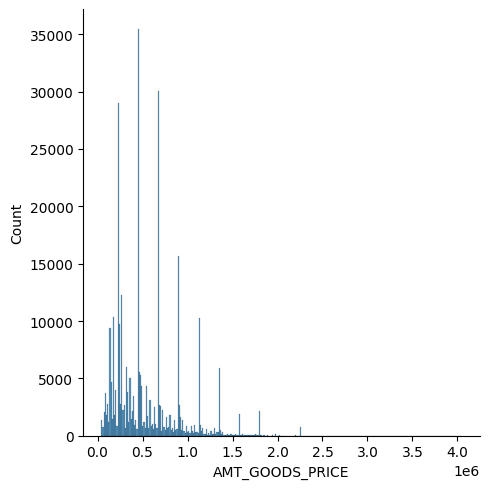

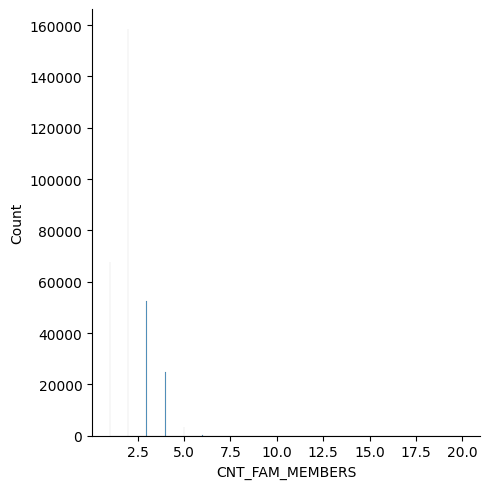

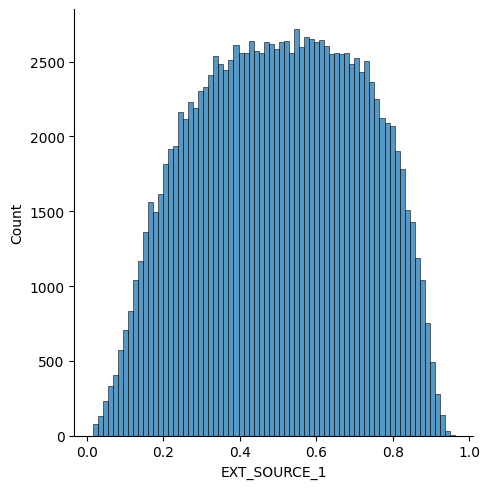

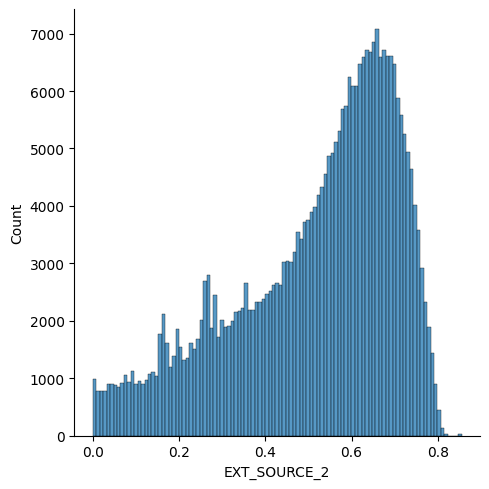

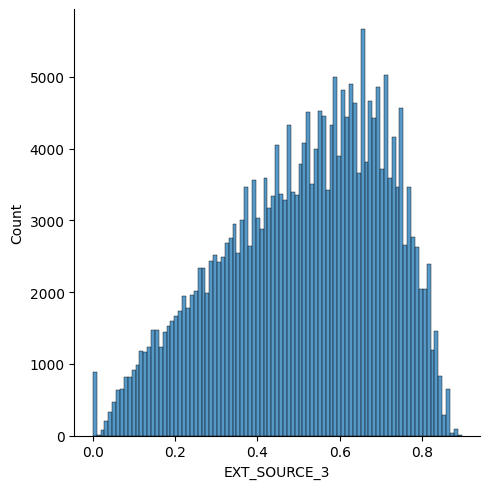

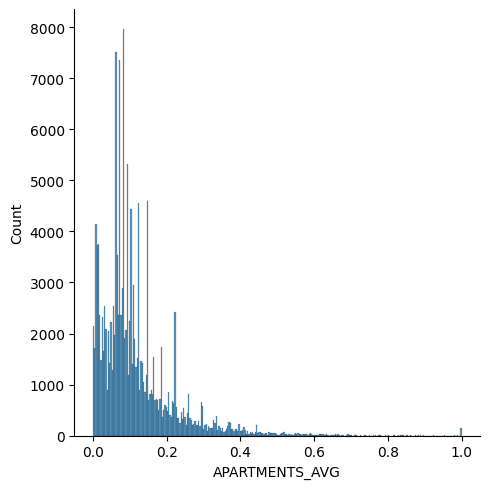

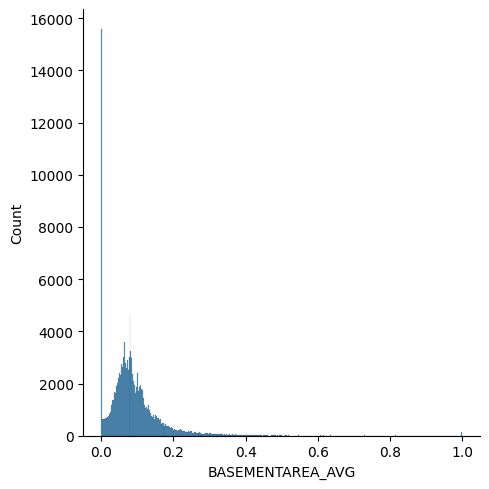

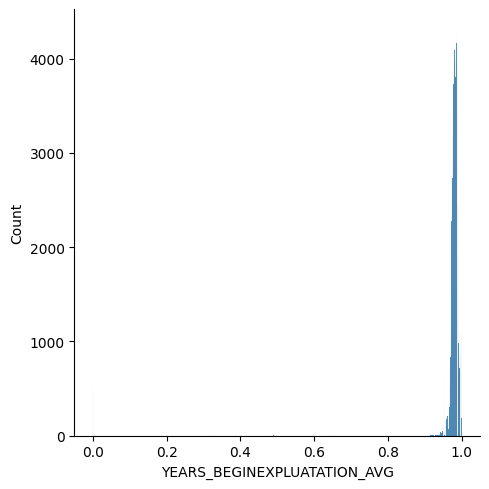

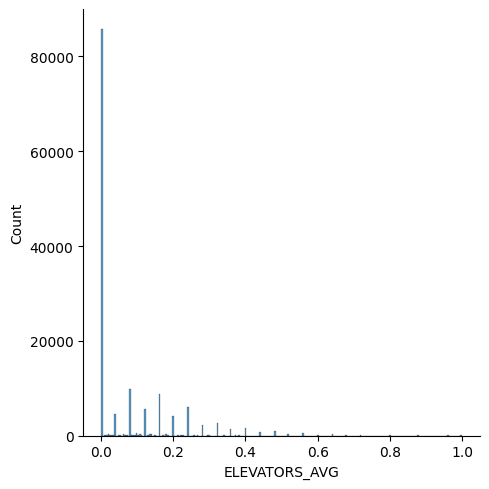

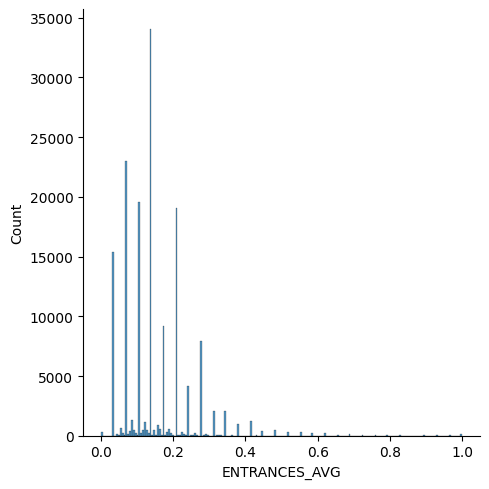

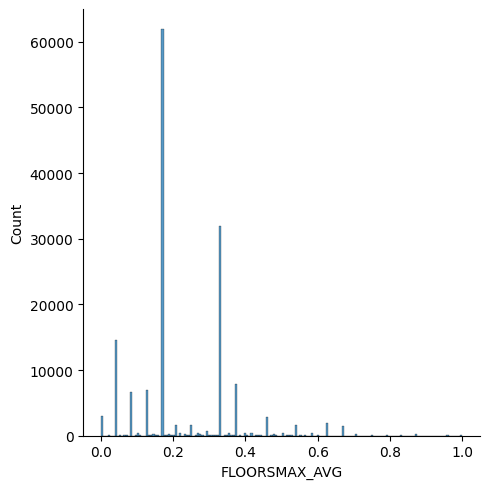

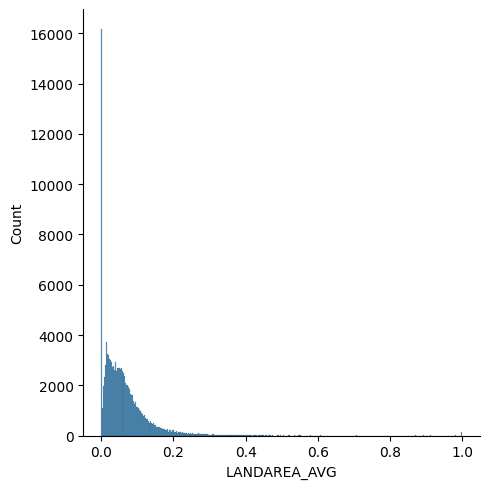

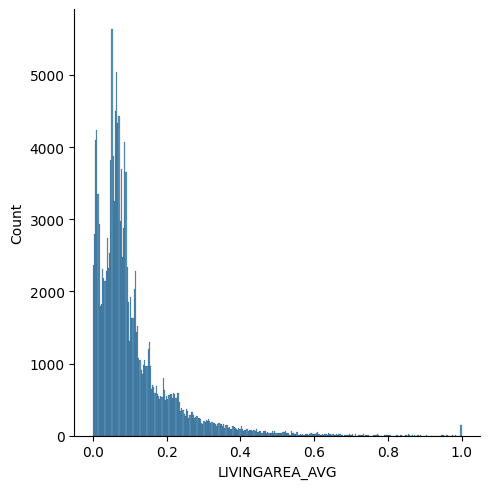

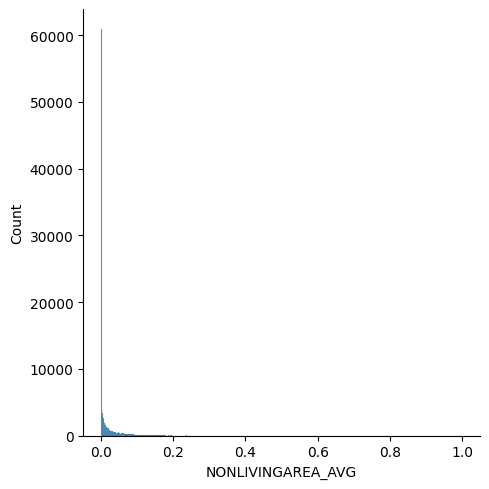

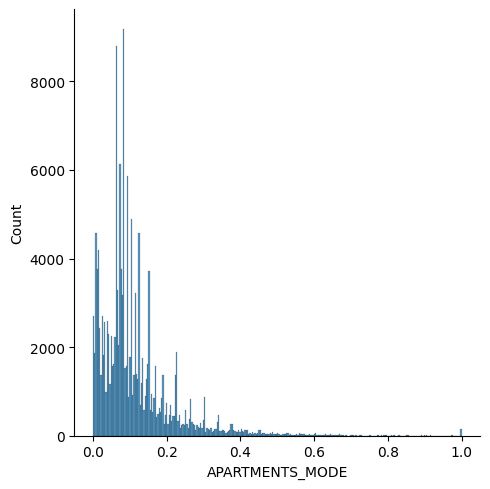

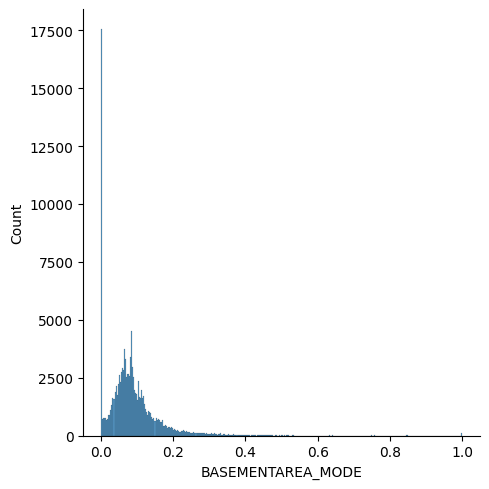

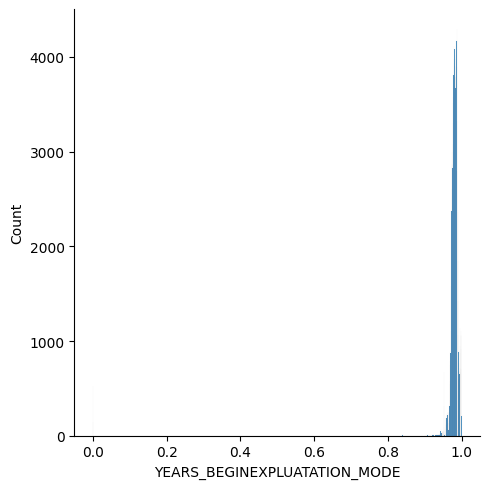

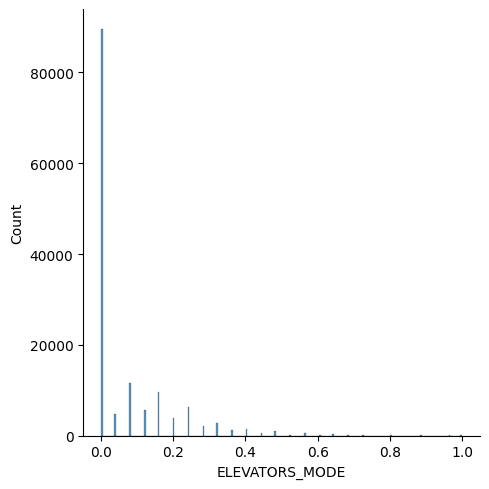

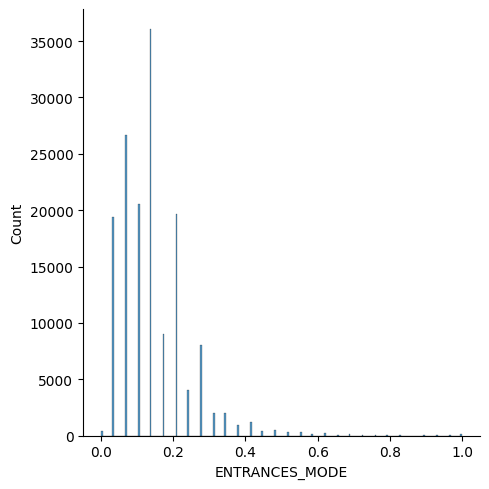

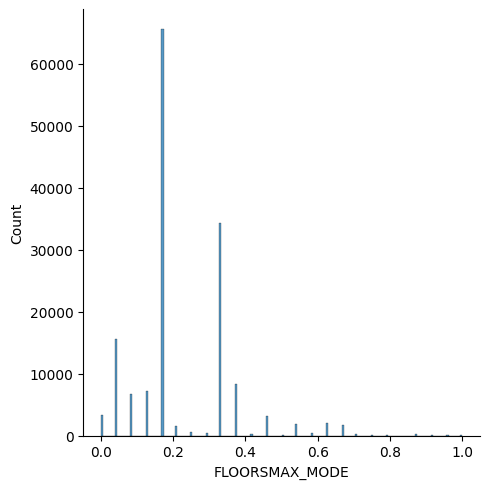

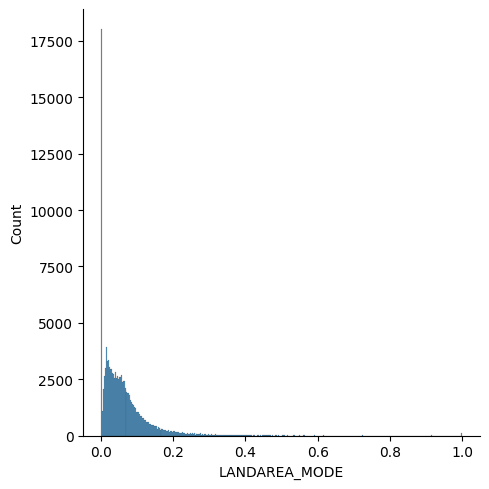

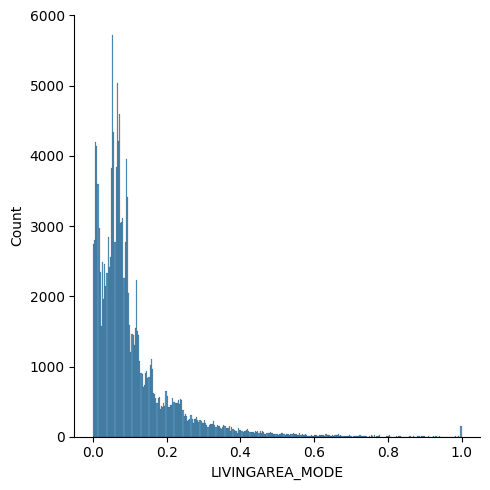

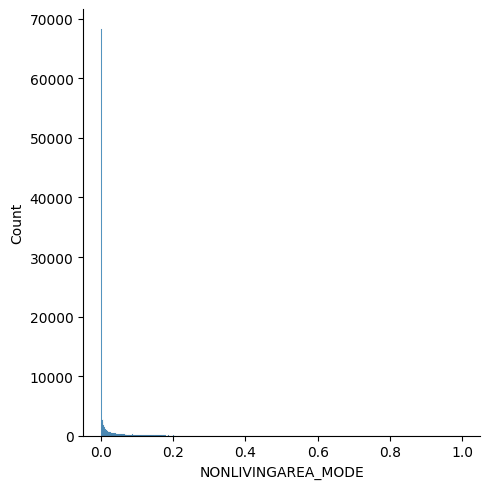

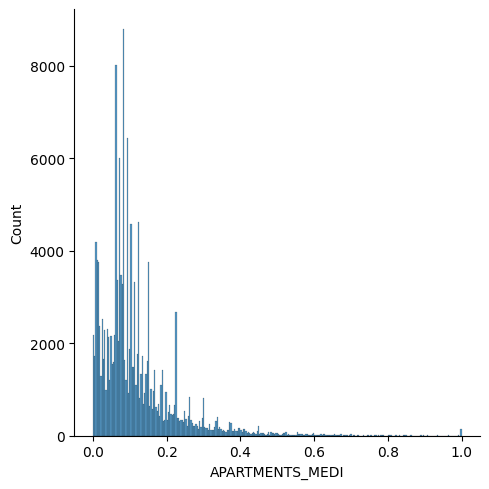

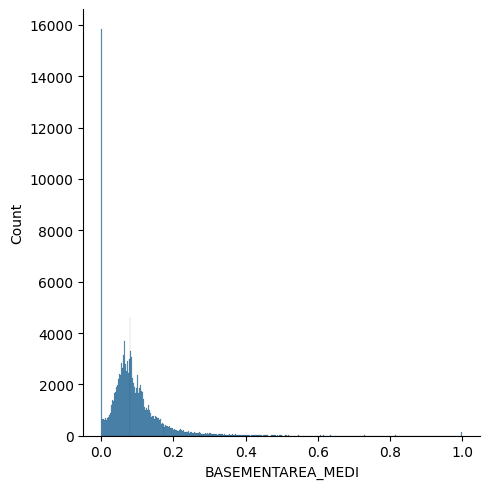

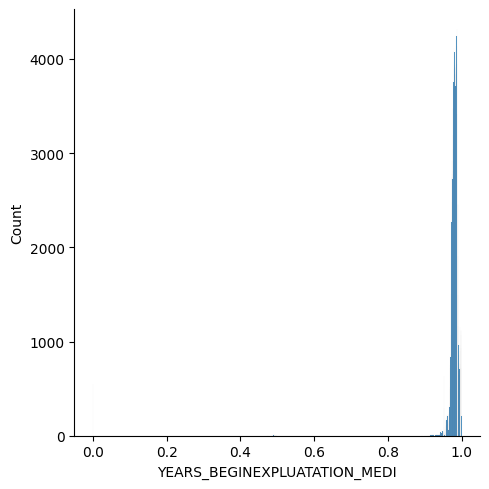

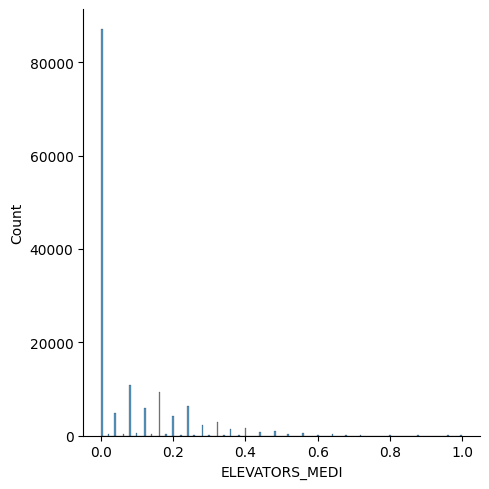

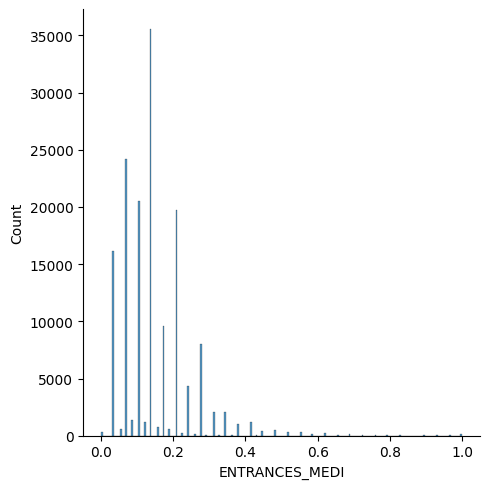

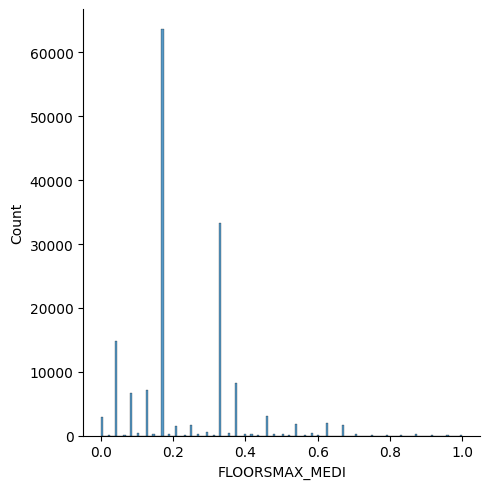

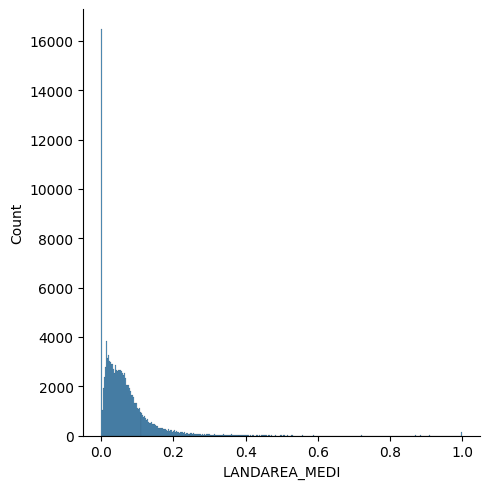

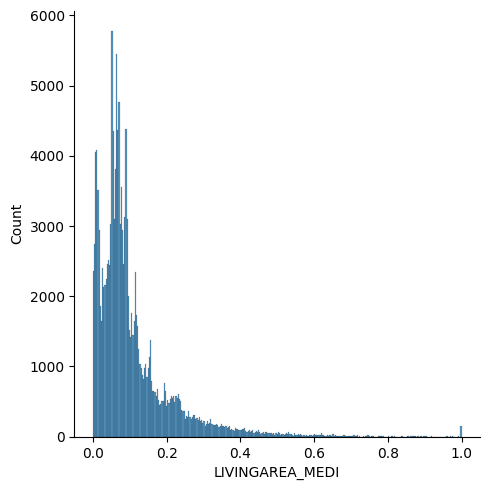

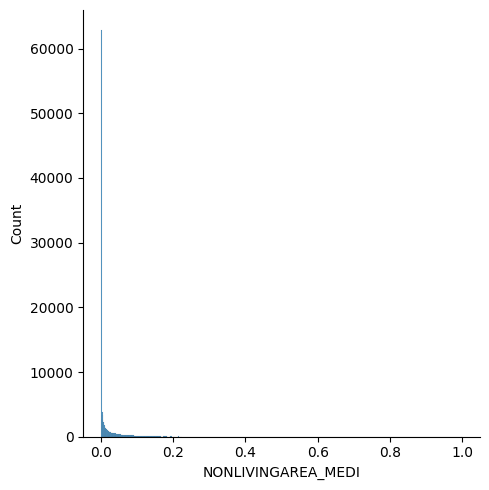

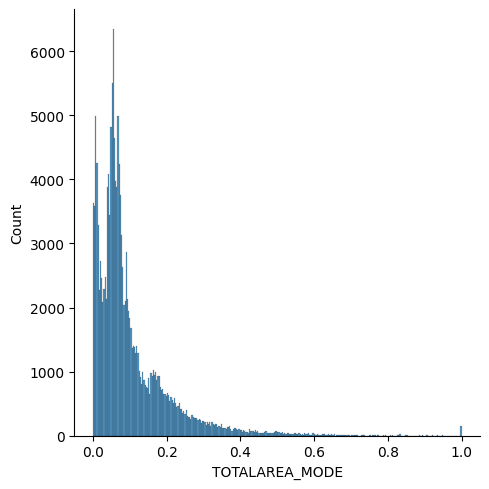

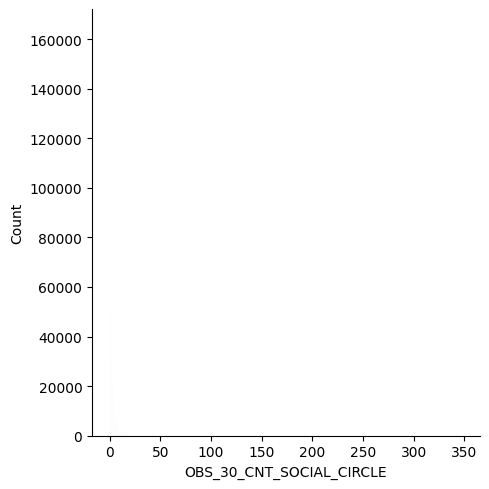

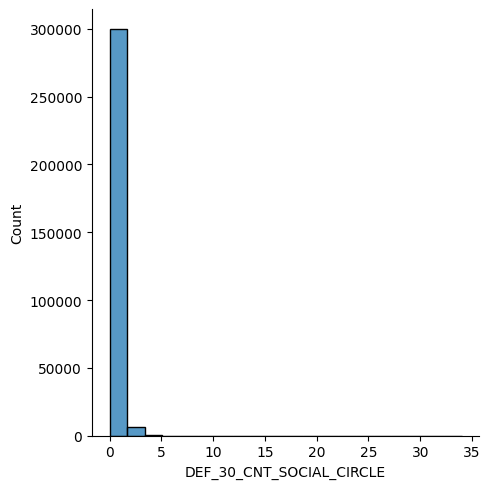

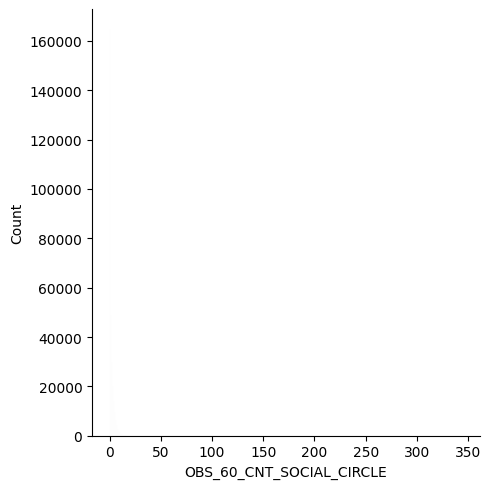

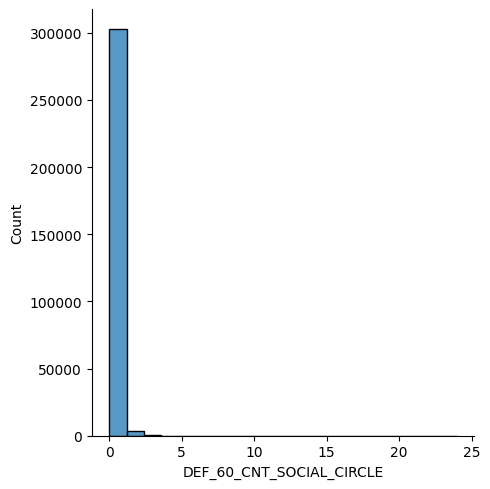

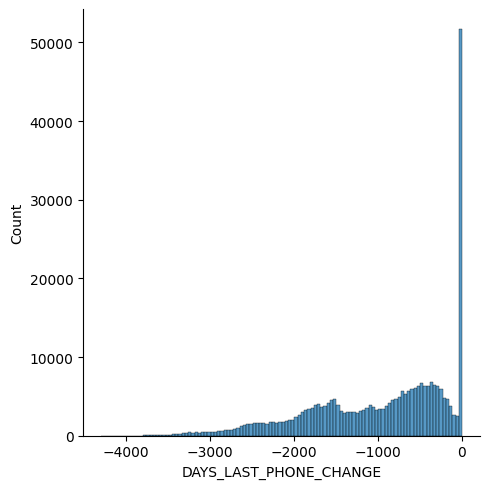

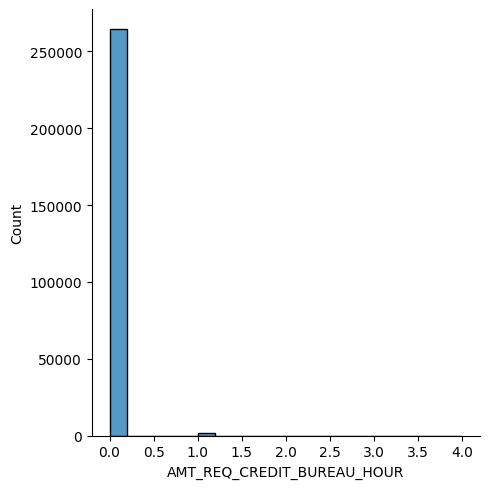

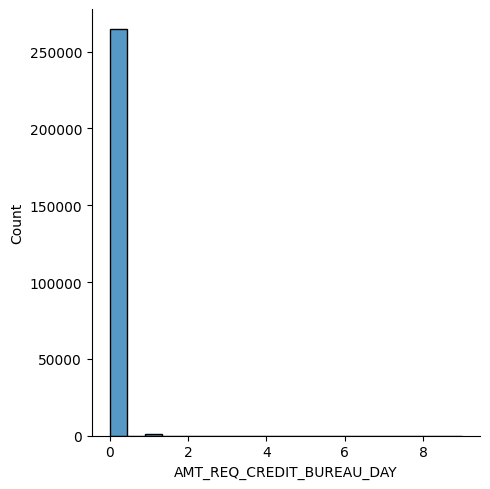

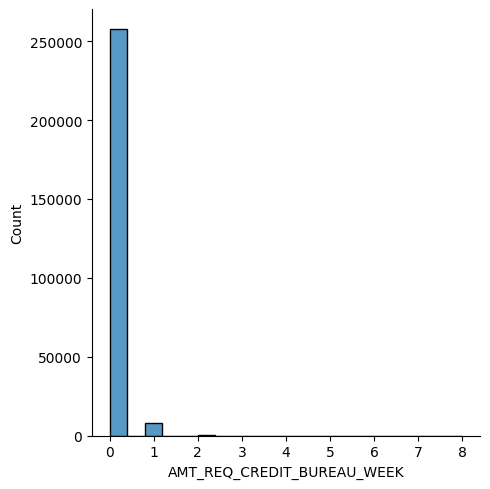

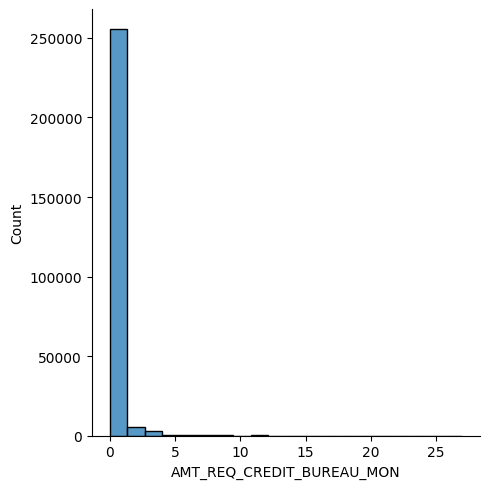

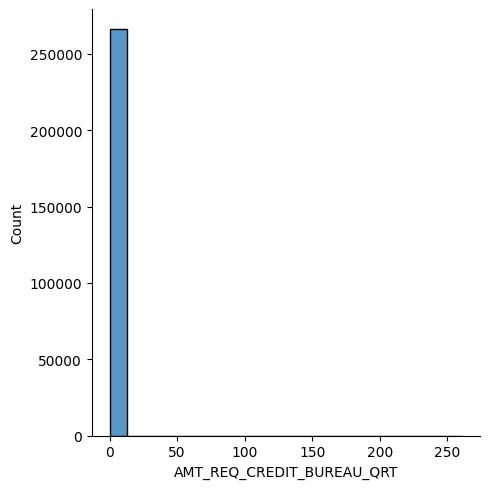

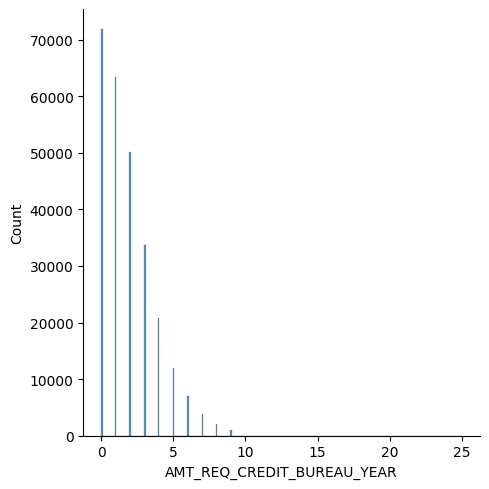

In [9]:
#get null column & if categoricaluse mode to fill null & if not use plot
null_columns=df.columns[df.isna().any()].tolist()
for i in null_columns:
  count=df[i].isna().sum()
  if(count<200000):
    if(df[i].dtype=='object'):
        #print(i,count,df[i].unique())
        mode = df[i].mode()
        df[i].fillna(mode[0], inplace=True)
    else:
      #print(i,count,df[i].unique())
      sns.displot(df[i])
  else:
    print(i,count)
    df=df.drop([i], axis=1)


In [10]:
# this columns is normalized distrbution so use mean to fill null
mean=df['FLOORSMAX_MEDI'].mean()
df['FLOORSMAX_MEDI'].fillna(mean, inplace=True)

mean=df['EXT_SOURCE_1'].mean()
df['EXT_SOURCE_1'].fillna(mean, inplace=True)

mean=df['FLOORSMAX_AVG'].mean()
df['FLOORSMAX_AVG'].fillna(mean, inplace=True)

# the rest columns is skywed distrbution so use median to fill null

null_columns=df.columns[df.isna().any()].tolist()

for i in null_columns:
  count=df[i].isna().sum()
  #print(i,count)
  median=df[i].median()
  df[i].fillna(median, inplace=True)

# **Encoding**

In [11]:
# encode categorical columns to handel it with models
cat_features=[]
for col in df.columns:
  if df[col].dtype=='object':
    print(df[col].unique())
    cat_features.append(col)


for col in cat_features:
  # Create a LabelEncoder object
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])
  pkl.dump(le , open("{}_le.pkl".format(col),"wb"))


['Cash loans' 'Revolving loans']
['M' 'F' 'XNA']
['N' 'Y']
['Y' 'N']
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']
['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
['Business Entity Type 3' 'School' 'Government

In [12]:
df['TARGET'].value_counts()
# data not balance

0    282686
1     24825
Name: TARGET, dtype: int64

# output visualization


In [13]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

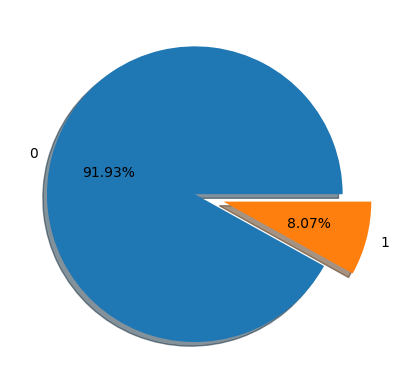

In [14]:
df['TARGET'].value_counts()
plt.pie(x=df['TARGET'].value_counts() , labels=[0,1] , explode=[0.0 , .2],autopct='%0.2f%%', shadow=True)
plt.show()

In [15]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('TARGET', axis=1), df['TARGET'])
df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [16]:
df['TARGET'].value_counts()

1    282686
0    282686
Name: TARGET, dtype: int64

In [17]:
df.duplicated().sum()

0

# **split_data(train,valid,test)**

In [18]:
input = df.drop('TARGET', axis = 1)
output = df['TARGET']

In [19]:
input.shape,output.shape

((565372, 104), (565372,))

In [20]:
#Split the data into training, validation, and test sets
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2, random_state=42)
input_train, input_valid, output_train, output_valid = train_test_split(input_train, output_train, test_size=0.2, random_state=42)

In [21]:
input_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
394347,409840,0,0,0,0,0,135000.000000,225000.000000,15319.368965,225000.000000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.587401
152640,276914,1,0,1,1,0,90000.000000,180000.000000,9000.000000,180000.000000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
205120,337775,0,0,1,1,0,135000.000000,269550.000000,20281.500000,225000.000000,...,0,0,0,0,0.0,0.0,0.0,0.0,1.000000,1.000000
108141,225450,0,1,0,0,0,193500.000000,545040.000000,28894.500000,450000.000000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
525708,170762,0,0,0,1,0,115405.412434,251229.935228,14733.993020,245763.531085,...,0,0,0,0,0.0,0.0,0.0,0.0,1.000000,0.385882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217989,352562,0,0,0,1,0,108000.000000,247275.000000,17716.500000,225000.000000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000
391840,114662,0,0,0,1,2,270000.000000,690435.924943,60196.810267,675000.000000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.422524,0.000000
231722,368400,0,0,0,1,0,81000.000000,540000.000000,17550.000000,540000.000000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,1.000000
214277,348303,1,0,1,1,0,67500.000000,202500.000000,10125.000000,202500.000000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,1.000000


# **StandardScaler**

In [22]:
# scale the data to optimize models

In [23]:
# use robust-scaler ... use this model of scaler because the data suffers from some outliers

scaler=RobustScaler()
input_train=scaler.fit_transform(input_train)
input_valid=scaler.transform(input_valid)
input_test=scaler.transform(input_test)
pkl.dump(scaler, open('scaler.pkl','wb'))


# **grid_serach_funcation**

In [24]:
# grid search function
def grid_serach_funcation(model,param_grid,x_train,y_train):
    grid = GridSearchCV(model, param_grid, cv=5,n_jobs=-1,scoring='accuracy')
    grid.fit(x_train, y_train)
    print('Best Params :', grid.best_params_)
    return grid.best_params_

# **Feature_selection**

In [25]:
results = df.corr(method='pearson')

<Axes: >

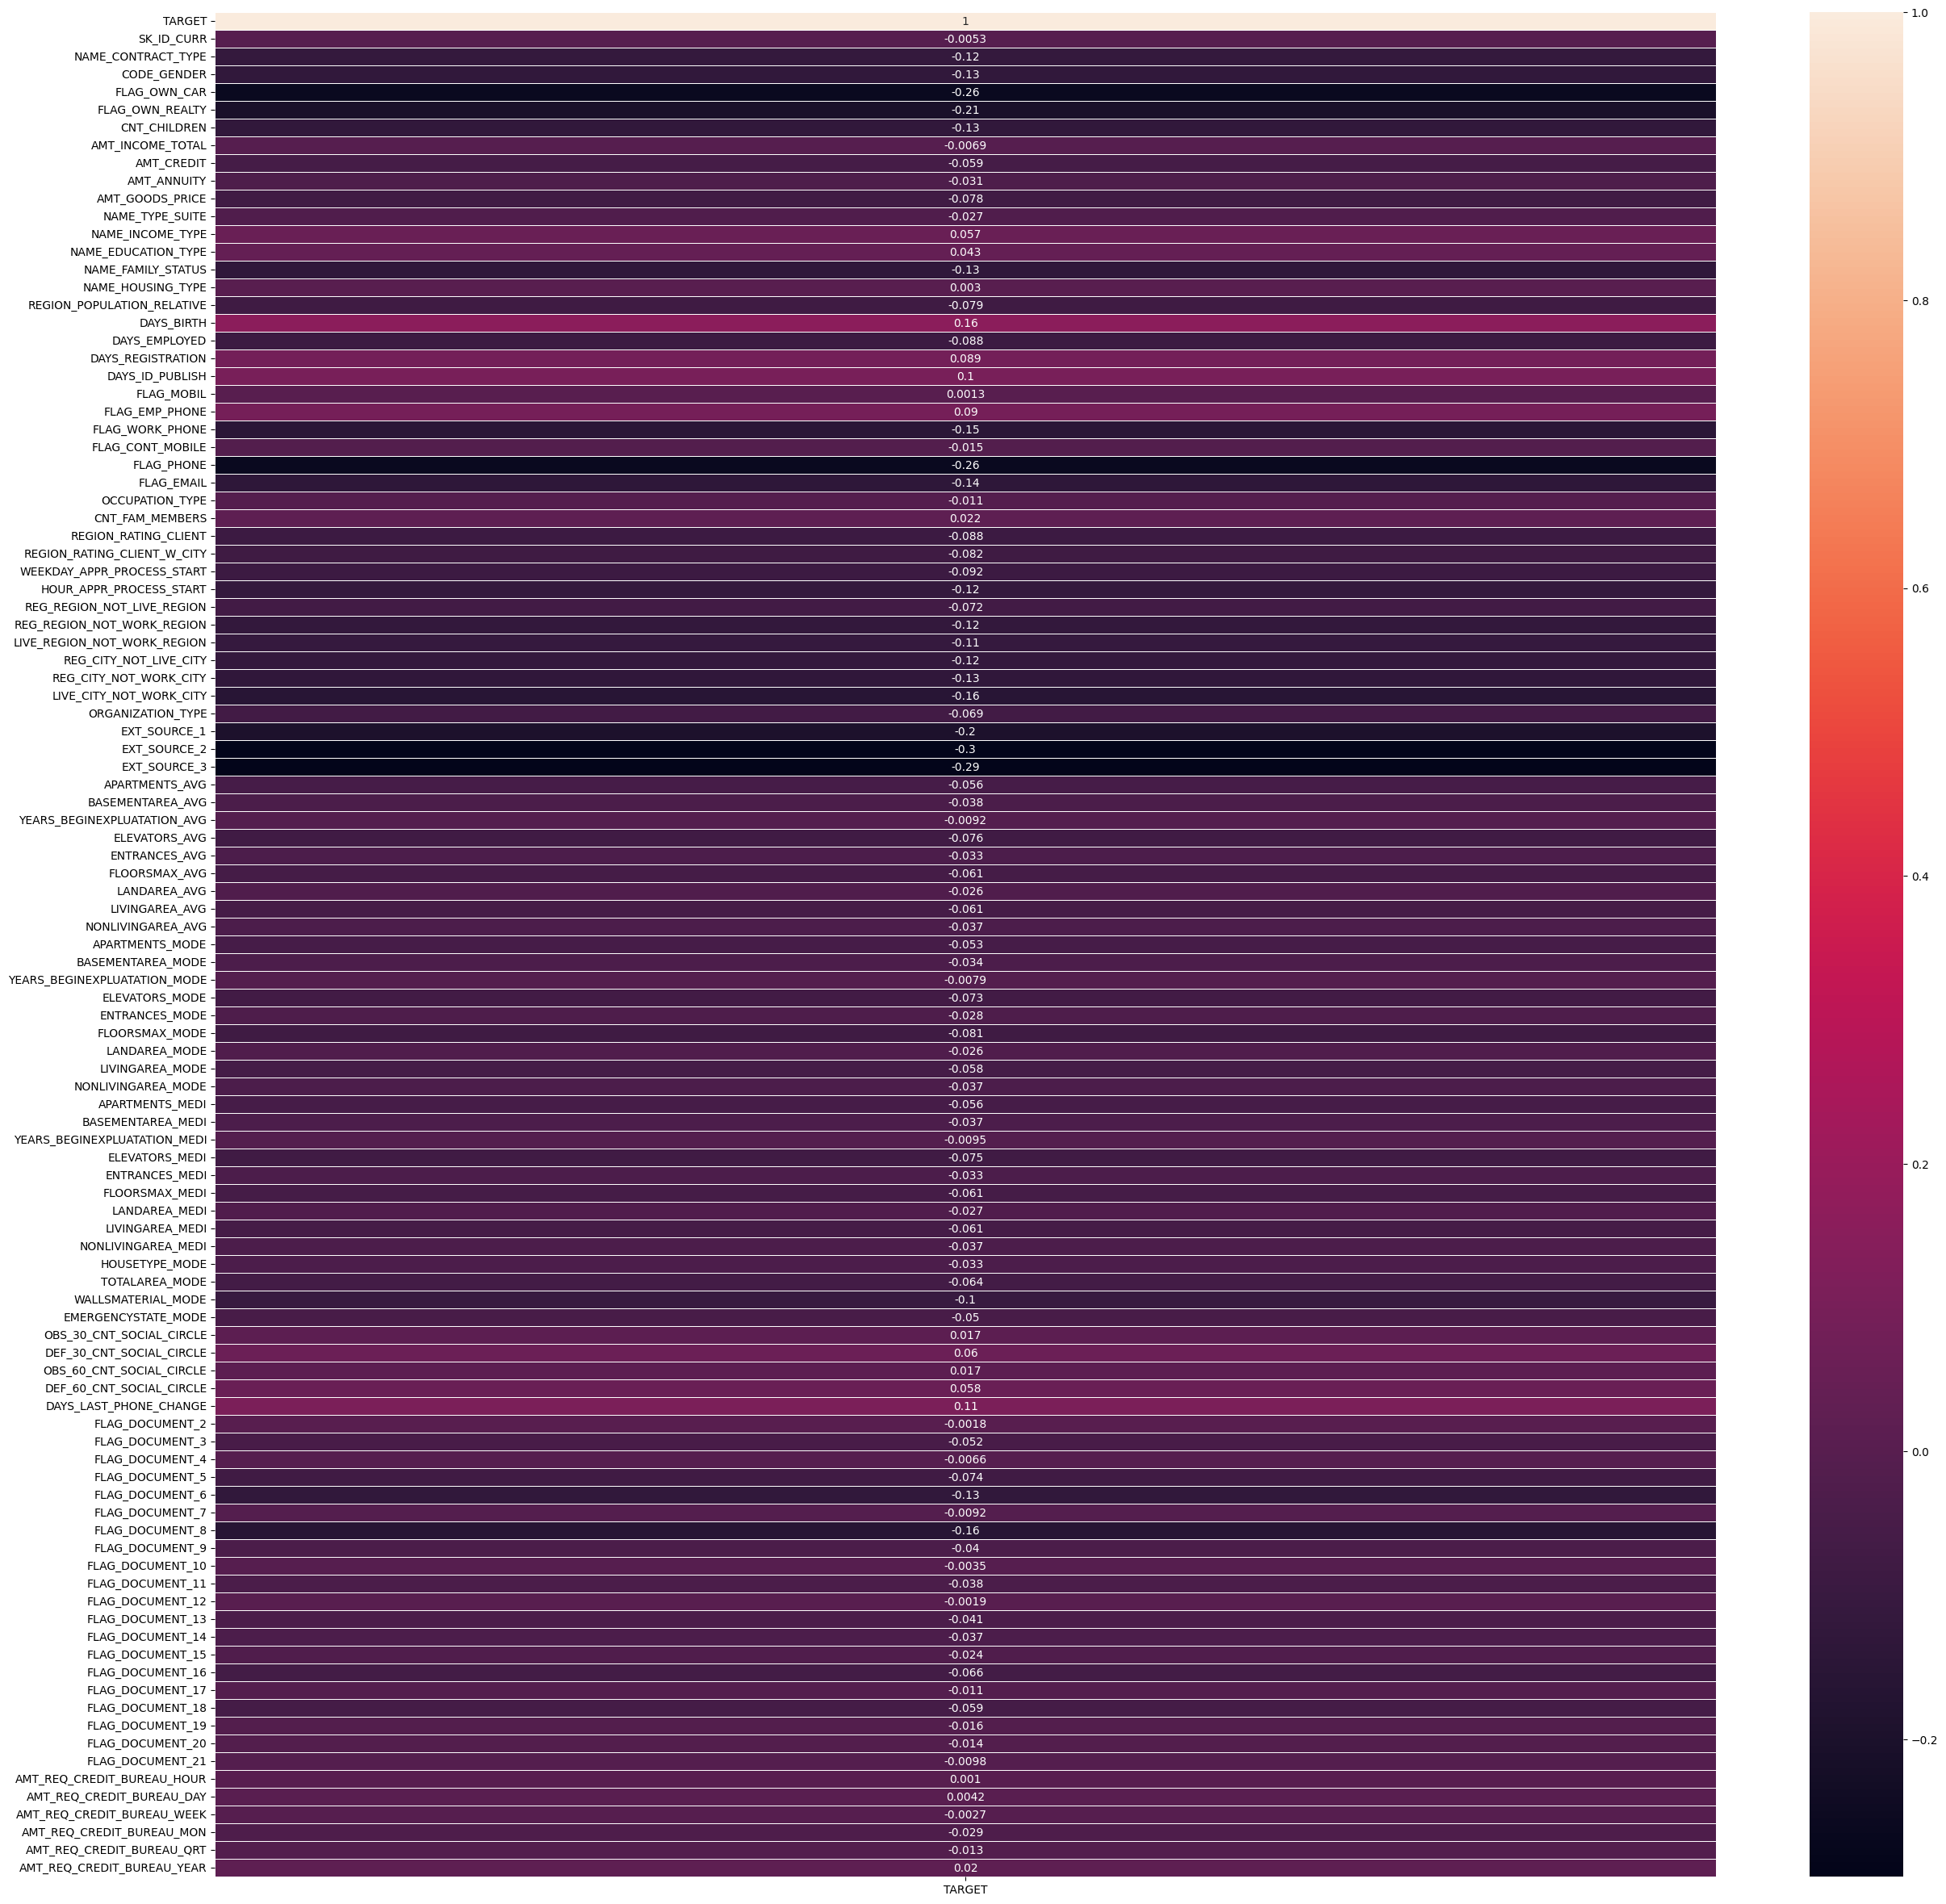

In [26]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(results[['TARGET']], annot=True, linewidths=.5)

In [27]:
# call grid search to get the best number of fetures
model = SelectKBest()
param_grid={
  'k':[15,20,30,40,50]
}
params=grid_serach_funcation(model,param_grid,input_train, output_train)


#apply feature selection
fs = SelectKBest(score_func=f_classif, k=params['k'])
fs.fit_transform(input_train, output_train)

input_train_selected=fs.transform(input_train)
input_valid_selected=fs.transform(input_valid)
input_test_selected=fs.transform(input_test)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Best Params : {'k': 15}


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [28]:
cols_idxs = fs.get_support(indices=True)
features_df_new = df.iloc[:,cols_idxs]
features_df_new

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,FLAG_DOCUMENT_5,FLAG_DOCUMENT_7
0,1,0,1,4,0.018801,1,1,1,0,0,5,0.083037,0.262949,0,0
1,0,0,0,1,0.003541,1,1,1,0,0,39,0.311267,0.622246,0,0
2,1,1,1,4,0.010032,1,1,1,0,0,11,0.502130,0.555912,0,0
3,0,0,1,4,0.008019,1,1,0,0,0,5,0.502130,0.650442,0,0
4,1,0,1,4,0.028663,1,1,0,0,1,37,0.502130,0.322738,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565367,0,0,0,4,0.020773,1,1,0,0,0,5,0.439978,0.338720,0,0
565368,1,0,1,4,0.015599,1,1,0,0,0,36,0.442157,0.171424,0,0
565369,0,0,1,4,0.035792,1,1,0,0,1,38,0.457193,0.385248,0,0
565370,1,1,1,4,0.021454,1,1,0,0,1,6,0.127285,0.379304,0,0


# apply Model

In [29]:
#RandomForestClassifier

In [30]:
model=RandomForestClassifier(class_weight='balanced', max_depth=12)
model.fit(input_train_selected,output_train)

RandomForestClassifier(class_weight='balanced', max_depth=12)

In [46]:
def evaluate_model(x_test, y_test):

  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_pred,y_test)
  recall=recall_score(y_pred,y_test)
  precision=precision_score(y_pred,y_test)
  F1=f1_score(y_pred,y_test)
  return pd.Series({'accuracy':accuracy,'recall':recall,'precision':precision,'F1':F1,})

In [47]:
evaluate_model(input_train_selected,output_train)

accuracy     0.811752
recall       0.810383
precision    0.813731
F1           0.812054
dtype: float64

In [48]:
evaluate_model(input_test_selected,output_test)

accuracy     0.803688
recall       0.803779
precision    0.803552
F1           0.803665
dtype: float64

In [34]:
#save model
pkl.dump(model,open('model.pkl',"wb"))

In [ ]:
# KNeighborsClassifier

In [ ]:
"""
call grid search to find best alpha
model = KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,7]}
params=grid_serach_funcation(model,param_grid,input_train_selected,output_train)
"""

In [ ]:
"""
model=KNeighborsClassifier(n_neighbors=params['n_neighbors'])

# Fit the model to the training data
model.fit(input_train_selected,output_train)
"""

In [ ]:
"""
evaluate_model(input_train_selected,output_train)
""""

In [ ]:
"""
evaluate_model(input_test_selected,output_test)
"""

In [ ]:
# use RandomForestClassifier ..  it give me high accuracy